data collection 

In [1]:
# for collection of data i have used dataset from kaggle for  heart failure prediction dataset 
import pandas as pd
df = pd.read_csv("Heart_failure_clinical_records_dataset.csv")   # making a data frame variable for dataset 
df.head() # displaying few values 

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Now checking if any values are missing 

In [5]:
# for there if any missing values .
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [7]:
# removing any duplicate values 
df.drop_duplicates(inplace=True)

In [9]:
#for summary of database with datatypes 
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [11]:
#for insights in data 
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.837237,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.900919,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


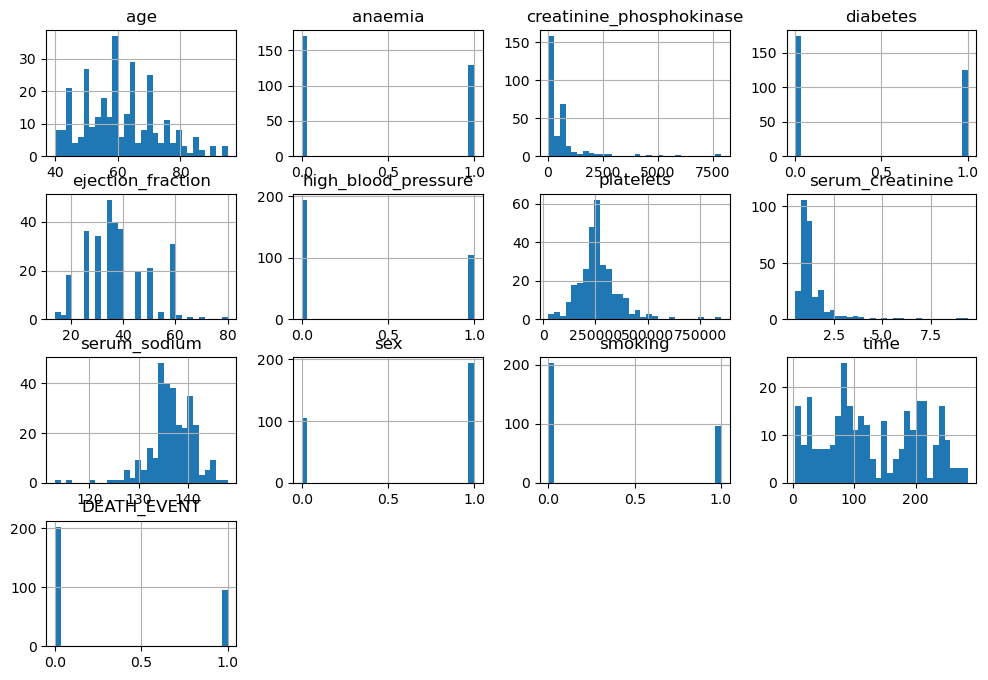

In [13]:
#  visualization of data 
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram for numerical features
df.hist(figsize=(12, 8), bins=30)
plt.show()

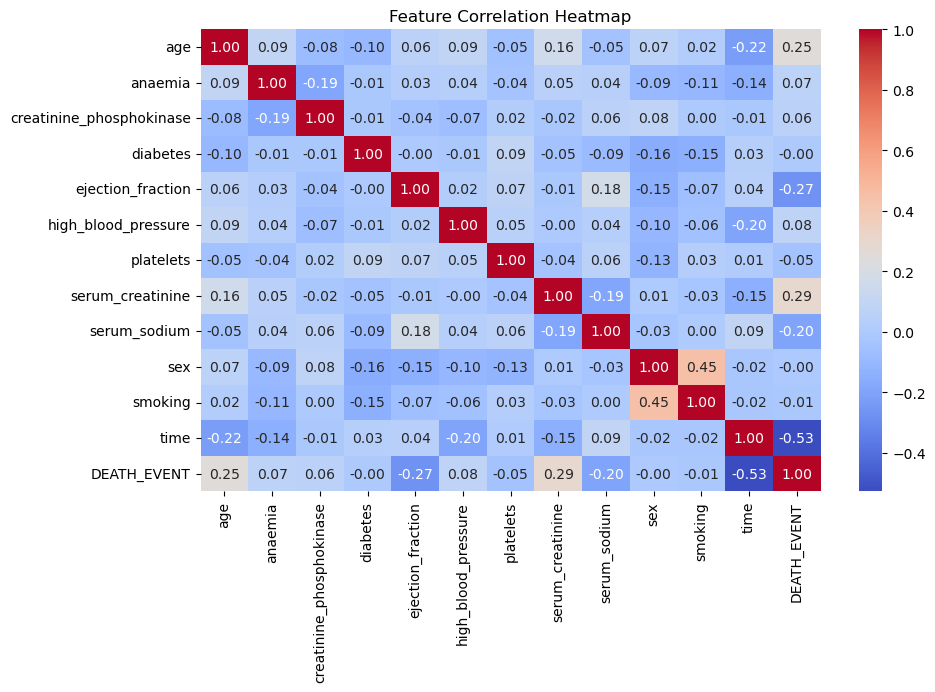

In [15]:
# heatmap for finding corelation between features 
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


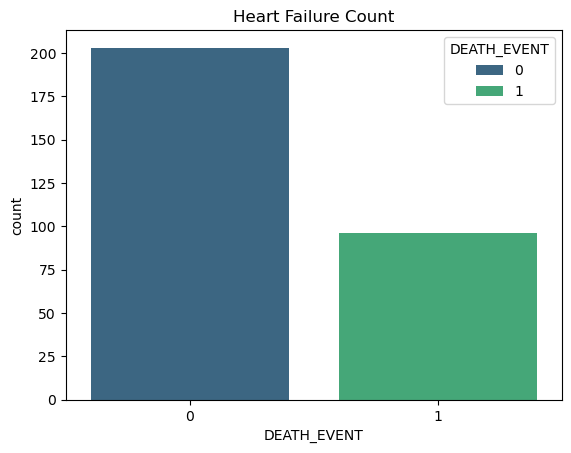

In [17]:
# now count plot for taget variable analysis for knowing heart failure occurrence and 
#helps check the class distribution that if dataset is balanced or not 
sns.countplot(x="DEATH_EVENT", data=df, hue="DEATH_EVENT", palette="viridis")
plt.title("Heart Failure Count")
plt.show()
# here 0 means patient who have survived and 1 who died 

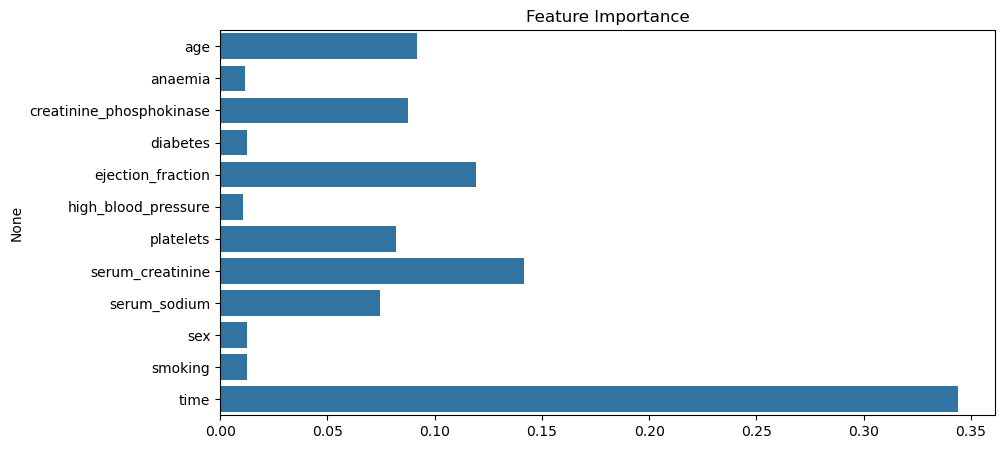

In [21]:
# using random forest model for feature importance 
# to identify the most contributing feature 
from sklearn.ensemble import RandomForestClassifier

X = df.drop("DEATH_EVENT", axis=1)  # Features
y = df["DEATH_EVENT"]  # Target

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.show()



In [65]:
# now with feature analysis corealation heatmap and target variable analysis , EDA  is complete 
# now next step is to select and train model, for that first the models needed to be compared 
# for that purpose i will b distinguishing between six models 
# 1 logistic regression
# 2 decision tree 
# 3 random forest classifier 
# 4  SVM (support Vector MAchine)
# 5 Gradient Boosting (Gradiaent boosting Classifier ) 
# 6 XGBoost ( XGB classifier) 

In [57]:
# importing required libraries for chosen models 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [39]:
# now for the model data is splitted and scaled 
# Defining Features (X) and Target (y)
X = df.drop("DEATH_EVENT", axis=1)  # Adjust column name if needed
y = df["DEATH_EVENT"]

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (important for SVM & Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [63]:
# now calculate and compare the accuracy 
# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(max_depth=5),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear"),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

# Train and evaluate models
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    
    print(f"\n Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(classification_report(y_test, y_pred))



 Model: Logistic Regression
Accuracy: 0.8000
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60


 Model: Decision Tree
Accuracy: 0.7167
              precision    recall  f1-score   support

           0       0.74      0.80      0.77        35
           1       0.68      0.60      0.64        25

    accuracy                           0.72        60
   macro avg       0.71      0.70      0.70        60
weighted avg       0.71      0.72      0.71        60


 Model: Random Forest
Accuracy: 0.7167
              precision    recall  f1-score   support

           0       0.70      0.91      0.79        35
           1       0.79      0.44      0.56        25

    accuracy                           0.72        60
  

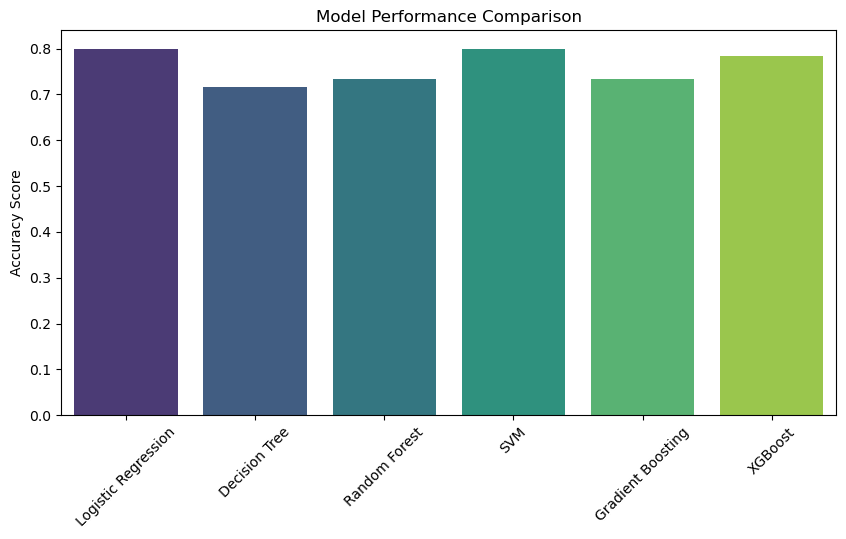

In [61]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x=list(results.keys()),
    y=list(results.values()),
    palette="viridis",
    hue=list(results.keys()),   # Assigning x to hue
    legend=False                # Disabling legend to avoid duplication
)
plt.xticks(rotation=45)
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison")
plt.show()



In [69]:
# as we can see the logistic regression and the XGBoost has same accuracy so we will be using logistic regression for further calculations
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2'],  # Regularization types
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga'],  # Solvers that support L1 or elasticnet
    'max_iter': [100, 200, 500]
}

# Create Logistic Regression model
logreg = LogisticRegression()

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=logreg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, scoring='accuracy', verbose=1)

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Evaluate the tuned model on test data
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Fitting 5 folds for each of 60 candidates, totalling 300 fits
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.8537234042553191

Test Accuracy: 0.8
              precision    recall  f1-score   support

           0       0.77      0.94      0.85        35
           1       0.88      0.60      0.71        25

    accuracy                           0.80        60
   macro avg       0.82      0.77      0.78        60
weighted avg       0.82      0.80      0.79        60



In [71]:
# checking if there are any imbalanced data in dataset 
df["DEATH_EVENT"].value_counts(normalize=True)


DEATH_EVENT
0    0.67893
1    0.32107
Name: proportion, dtype: float64

In [73]:
# here the dataset is highly imabalanced because one class is significantly overpower other then  model may not pay attension to minority 
# so handling the imabalanced dataset using SMOTE
from imblearn.over_sampling import SMOTE

# Apply SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check new class distribution
print(y_train_resampled.value_counts())


DEATH_EVENT
1    168
0    168
Name: count, dtype: int64


In [79]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

# Assign the trained model to final_model
final_model = log_reg

# Predict on test data
y_pred = final_model.predict(X_test)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



🔍 Final Evaluation Metrics (Logistic Regression)

Accuracy:  0.8000
Precision: 0.8421
Recall:    0.6400
F1 Score:  0.7273
ROC-AUC:   0.8320


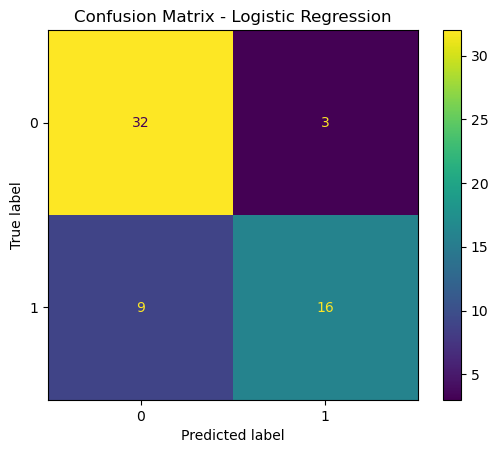


 Classification Report:

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.84      0.64      0.73        25

    accuracy                           0.80        60
   macro avg       0.81      0.78      0.78        60
weighted avg       0.81      0.80      0.79        60



In [81]:
# FINAL MODEL EVALUATION 
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Predict on test set
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]  # For ROC-AUC

# Metrics
print("🔍 Final Evaluation Metrics (Logistic Regression)\n")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:   {roc_auc_score(y_test, y_prob):.4f}")

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Detailed report
print("\n Classification Report:\n")
print(classification_report(y_test, y_pred))


In [85]:
# now saving the model for later deploying it to use with frontend using joblib
import joblib
joblib.dump(final_model, 'final_frontend_model.pkl')


['final_frontend_model.pkl']